## Aula 20 - Feature Engineering - Parte 3

### Organizando a bagunça...

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.## Aula 20 - Feature Engineeringpreprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from confusion_matrix import plot_confusion_matrix

In [2]:
def load_data(path):
    return pd.read_csv(path)

In [3]:
def filter_numeric(data):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    data_num = data.select_dtypes(include=numerics).copy()
    data_num = data_num.drop(columns=['ADP', 'Cod.Cargo', 'Cod.Cargo Admissão', 'CC', 
                                              'Hora Extra 2016', 'Hora Negativa 2016', 'Ad. Noturno 2016', 
                                              'Absenteísmo 2016', 'Hora Extra 2017', 'Hora Negativa 2017', 
                                              'Ad. Noturno 2017', 'Absenteísmo 2017', 'Banda', 
                                              '2012/13 Goal Achievement'], axis=1)
    return data_num

In [26]:
def fillnas_mean(data):
    #cuidado com a coluna target!!!
    for col in data.columns:
        qtt = data[col].isnull().sum()
        if qtt > 0:
            print(col, qtt)
            data.update(data[col].fillna(data[col].mean()))
    return data

In [5]:
def apply_scaler(data, target_col):
    target = data[target_col]
    data2scale = data.drop(columns='PROMOVIDO')
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data2scale), columns=list(data2scale.columns))
    # nao precisaria necessariamente reincluir o target!
    data_scaled[target_col] = target
    return data_scaled

In [6]:
def add_cat_onehot(data, cat_series, cat_label):
    # Label encoder
    le = LabelEncoder()
    cat_intlabels = le.fit_transform(cat_series)
    data[cat_label] = cat_intlabels
    
    #One Hot Encoder
    ohe = OneHotEncoder()
    cat_cols = ohe.fit_transform(data[[cat_label]]).toarray()
    data.drop(columns=[cat_label], inplace = True)
    
    #Add to data df
    cat_cols_labels = [cat_label+str(cat_intlabel) for cat_intlabel in set(cat_intlabels)]
    cat_df = pd.DataFrame(cat_cols, columns=cat_cols_labels)
    return pd.concat([data,cat_df], axis=1)

In [30]:
# Insira funções que utilizam outros encodings...

In [9]:
def train_predict_logreg(data, target_col):
    X = data.drop(columns=target_col)
    y = data[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    logreg = LogisticRegression(random_state=42, class_weight='balanced')
    logreg.fit(X_train, y_train)
    return logreg.predict(X_test),y_test

In [18]:
def save_confusion_matrix(fig, path):
    fig.savefig(path)

In [11]:
original_data_path = 'Base Analytics.csv'
target_col = 'PROMOVIDO'

In [27]:
original_data = load_data(original_data_path)
original_data = original_data[original_data['Admissão'] >= '2011-01-01'].reset_index().drop(columns='index')

In [28]:
data = filter_numeric(original_data)
data = fillnas_mean(data)
data = apply_scaler(data,target_col)

2013/14 Goal Achievement 245
2014/15 Goal Achievement 229
2015/16 Goal Achievement 148
2016/17 Goal Achievement 143


In [29]:
data.shape

(356, 8)

In [13]:
data = add_cat_onehot(data, original_data['Sexo'], 'Sexo_')
#data = add_cat_onehot(data, original_data['Cargo'], 'Cargo_')
data = add_cat_onehot(data, original_data['Area'], 'Area_')
#data = add_cat_onehot(data, original_data['Diretoria'], 'Diretoria_')

2013/14 Goal Achievement 245
2014/15 Goal Achievement 229
2015/16 Goal Achievement 148
2016/17 Goal Achievement 143


Confusion matrix, without normalization
[[80 10]
 [ 4 13]]
Normalized confusion matrix
[[ 0.88888889  0.11111111]
 [ 0.23529412  0.76470588]]


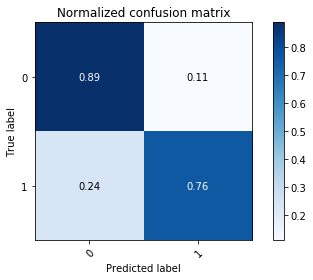

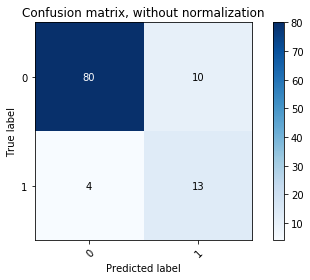

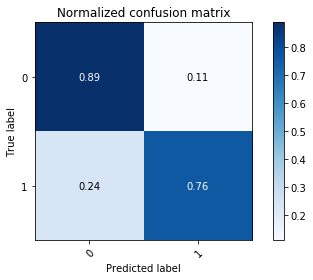

In [14]:
y_pred, y_test = train_predict_logreg(data, target_col)
plot_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalize='yes')

Normalized confusion matrix
[[ 0.88888889  0.11111111]
 [ 0.23529412  0.76470588]]


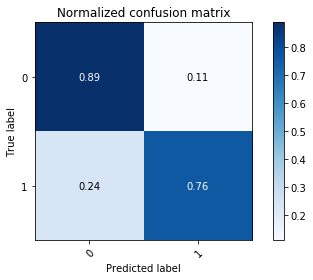

In [15]:
r = plot_confusion_matrix(y_test, y_pred, normalize='yes')

In [22]:
save_confusion_matrix(r,'test2')

In [25]:
data.shape

(356, 46)

### Outros encoders 

[Mais detalhes sobre outros métodos de Feature Engineering - HJ van Veen](https://www.dropbox.com/s/mebc9i6kxgm516c/feature-engineering-mlmeetup.pdf?dl=0)
Incluindo spatial data (Lat, Long, address etc) e Natural Langague Processing

##### Links do pré-aula
[Continuous Numeric Data](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b)

[Categorical Data](https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63)


### Missing values
[Página documentação Pandas](http://pandas.pydata.org/pandas-docs/version/0.22/missing_data.html)

### Forma interessante de executar diferentes combinações de features, encoders, algoritmos

[Pipeline](https://scikit-learn.org/0.19/modules/generated/sklearn.pipeline.Pipeline.html)

